<a href="https://colab.research.google.com/github/lunduniversity/schoolprog-satellite/blob/master/keeling_inspiration_short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keeling-kurvan

1958 började forskaren Charles Keeling mäta koldioxidhalten från en mätstation på vulkanen Mauna Loa på Hawaii.

I denna övning använder vi programmering för att undersöka hur koldioxidhalten ändrats de senaste åren. Vi använder programspråket Python.


<img src="https://github.com/lunduniversity/schoolprog-satellite/blob/master/exercises/co2/figs/hawaii.png?raw=1" width="750" align="center"/>

<hr size=5 noshade>

#1. Kör lite kod
Vi börjar med att kontrollera att du kan köra kod.

-----

**Uppdrag 1a:** Du behöver vara uppkopplad för att kunna köra kod.

  * Klicka på `Anslut` eller `Connect`uppe till höger.
  * Efter en stund ska det står `RAM` och `DISK`.


<details>
<summary markdown="span">
Problem?
</summary>
<p>
För att kunna klicka på Anslut behöver du vara inloggad på ett Google-konto. Om du är inloggad så finns det en färgad cirkel uppe till höger i fönstret. Annars står det "Logga in" där. 
</p><p>
Om du fortfarande har problem, kontrollera vilken browser du kör. Det kan vara problem om du kör Edge. Byt i så fall till Chrome eller Firefox. Safari brukar också fungera. </p>
</details>

-----

**Uppdrag 1b:** Prova nu att köra "kodrutan" nedan genom att hålla musen över koden och klicka på den lilla pilen till vänster i kodrutan.

Det kan komma upp en varning som du behöver godkänna.



In [ ]:
for _ in range(5):
  print("Hejhejhej")

Hejhejhej
Hejhejhej
Hejhejhej
Hejhejhej
Hejhejhej


Vad skrivs ut?

<details>
<summary markdown="span">
Svar
</summary><p>
"Aloha!" skrivs ut tre gånger. <br>
Aloha betyder "hej" på Hawaiianska.</p>
</details>

-----

**Uppdrag 1c:** Prova att ändra från 3 till 5 i koden. Kör koden igen. Vad händer?

-----

## 2. Var ligger Mauna Loa?

Nu skall vi se var mätstationen ligger. I kodrutan nedan finns kod för att visa en karta.

-----

**Uppdrag 2a:** Kör koden nedan. Får du upp kartan? 

In [ ]:
# Importera modul för kartor
import folium

# Skapa karta över rätt område
m = folium.Map(location=[19.5362, -155.5763], zoom_start=7)

# Lägg till en markör på kartan
folium.Marker(location=[19.5362, -155.5763],
              popup='Mauna Loa Observatory',
              icon=folium.Icon(color='darkred', icon='cloud')).add_to(m)

# Visa kartan
m

-----

**Uppdrag 2b:** Var ligger Mauna Loa  i förhållande till olika världsdelar?

<details>
<summary markdown="span">
Svar
</summary>
<p>Mauna Loa ligger på ön Hawaii som är den största ön i ö-riket Hawaii. Om du zoomar ut ser du att Hawaii-öarna ligger mitt ute i Stilla Havet, med Asien och Australien på västra sidan och Amerika på östra.</p>
</details>

-----

**Uppdrag 2c:** Ändra i koden ovan för att göra Mauna Loas pin i en annan färg än `darkred` och med en annan ikon än ett moln (`cloud`). <br>Andra färger du kan prova är `blue` eller `green`. Andra ikoner du kan prova är `star` eller `flag`.

-----


**Uppdrag 2d:** Vad kan vara för- och nackdelar med att mäta koldioxidhalten på Mauna Loa? Fundera och diskutera gärna med en kompis innan du tittar på svaret.

<details>
<summary markdown="span">
Svar
</summary>
<p>Eftersom Mauna Loa ligger mitt i Stilla Havet blir mätningarna inte påverkade av saker runt omkring. Det finns inga stora skogar i närheten som tar upp koldioxid. Det finns inte heller några stora industrier eller mycket bilar som släpper ut koldioxid. Mätstationen är högt uppe på ett berg och man undviker därmed lokala effekter som kan finnas i dalar.</p>
<p>Mätningarna kan sägas visa ett medelvärde för hela Stilla Havet. Mätvärdena kan antas vara representativt för hela jorden.</p>
<p>En sak som dock kan påverka lokalt är om det råkar bli ett vulkanutbrott i närheten vilket händer då och då på Hawaii. De mätvärdena får då sorteras bort.</p>
</details>

-----


##3. Mätvärdena
Mätvärdena från Mauna Loa finns fritt tillgängliga i en fil på internet. Vi ska nu hämta filen så att vi sedan kan analysera mätvärdena.

-----

**Uppdrag 3a:** Kör koden nedan. Följande görs:
  * Filen hämtas till programmet.
  * Raderna med metadata och rubrikerna för kolumnerna rensas bort. Vi vill bara ha kvar mätvärdena när vi ska programmera.
  * De första 5 raderna med mätvärden skrivs ut.



In [ ]:
# Hämta filen från internet
import requests
response = requests.get("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv")
raw_text = response.text
raw_lines = raw_text.splitlines()
# Filens data finns nu i variabeln "raw_lines" - en lista av textrader

# Ta bort raderna med metadata (rader som startar med citationstecken)
raw_lines_data = [line for line in raw_lines if not line.startswith('"')]

# Ta bort de 3 första raderna som innehåller rubriker.
data = raw_lines_data[3:]
# Raderna med mätvärden finns nu i variabeln "data"

# Skriv ut de 5 första raderna
for i in range(10):
  print(data[i])

1958, 01,   21200, 1958.0411,   -99.99,   -99.99,     -99.99,   -99.99,     -99.99,   -99.99
1958, 02,   21231, 1958.1260,   -99.99,   -99.99,     -99.99,   -99.99,     -99.99,   -99.99
1958, 03,   21259, 1958.2027,   315.70,   314.43,     316.19,   314.90,     315.70,   314.43
1958, 04,   21290, 1958.2877,   317.45,   315.16,     317.30,   314.98,     317.45,   315.16
1958, 05,   21320, 1958.3699,   317.51,   314.71,     317.86,   315.06,     317.51,   314.71
1958, 06,   21351, 1958.4548,   -99.99,   -99.99,     317.24,   315.14,     317.24,   315.14
1958, 07,   21381, 1958.5370,   315.86,   315.19,     315.86,   315.22,     315.86,   315.19
1958, 08,   21412, 1958.6219,   314.93,   316.19,     313.99,   315.29,     314.93,   316.19
1958, 09,   21443, 1958.7068,   313.21,   316.08,     312.46,   315.35,     313.21,   316.08
1958, 10,   21473, 1958.7890,   -99.99,   -99.99,     312.43,   315.41,     312.43,   315.41


Får du ut de första 5 raderna? Ser du att vissa värden är negativa? Detta motsvarar saknade eller ogiltiga mätningar.
<details>
<summary markdown="span">
Mer information om mätvärdena
</summary>
<p>
Kolumnerna innehåller följande:<br>
<table style="width:100%">
  <tr>
    <th>1. år</th>
    <th>2. månad</th>
    <th>3. något konstigt</th>
    <th>4. datum i decimalform</th>
    <th>5. de riktiga mätvärdena</th>
    <th>6. trendlinje för 5</th>
    <th>7. mätvärden, justerade</th>
    <th>8. trendlinje för 7</th>
    <th>9. mätvärden där saknade mätvärden har estimerats</th>
    <th>10. trendlinje för 9</th>
  </tr>

</table>

</p>

</details>
<details>
<summary markdown="span">
Problem?
</summary>
<p>
Om du inte får ut informationen så kanske filen har flyttats, eller dess format har ändrats. Prova i så fall att använda en version av filen vi sparat ner i december 2020. Du gör detta genom att ändra url:en i koden ovan till  
</p>
<p><code>
https://raw.githubusercontent.com/lunduniversity/schoolprog-satellite/master/exercises/co2/monthly_in_situ_co2_mlo.csv
</code></p>
</details>


-----

**Uppdrag 3b:** Ändra i koden så att de första 10 raderna skrivs ut. 




-----

#4. Plotta Keeling-kurvan

Vi vill nu plotta mätvärdena så att vi får en kurva.

Vi kommer att använda värdena i fjärde kolumnen (tidpunkten) och värdena i nionde kolumnen (mätvärden). 

Det är egentligen värdena i den femte kolumnen som är de riktiga uppmätta värdena. Men vissa värden kan saknas, t.ex. om mätutrustningen var sönder eller om mätningen störts av t.ex. av ett vulkanutbrott. Sådana värden visas som `-99.99`. I nionde kolumnen har saknade värden ersatts med uppskattade värden, som räknats fram med hjälp av de närmast föregående och efterföljande värdena.

Koldioxidhalten mäts i "ppm" vilket betyder "parts per million".

-----

**Uppdrag 4a:** Plotta Keeling-kurvan genom att köra koden nedan. 



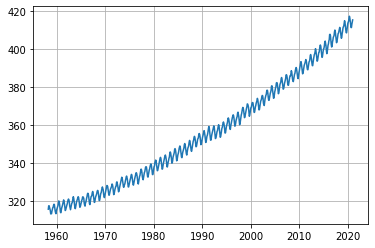

In [ ]:
# Plocka ut år-värden och co2-mätvärden från varje rad
years = []
co2 = []
for line in data:
  splitted = line.split(",")
  y = float(splitted[3]) # fjärde kolumnen, år
  c = float(splitted[4]) # nionde kolumnen, co2
  if c > 0:  # Lägg till värdena om co2-värdet är ett giltigt värde
    years.append(y)
    co2.append(c)

# Plotta mätvärdena med år på x-axeln och co2 på y-axeln
import matplotlib.pyplot as plt
plt.plot(years, co2)
plt.grid()


-----

**Uppdrag 4b:** Cirka hur många ppm koldioxid var det när man började mäta? Cirka hur många ppm är det nu? Läs av i kurvan.

<details>
<summary markdown="span">
Svar
</summary>
<p>I slutet av 50-talet var koldioxidhalten strax under 320 ppm.</p>
<p>Runt 2015 passerades 400 ppm och kurvan fortsätter bara uppåt. Det är alltså en enormt kraftig ökning av koldioxidhalten i atmosfären. </p>
</details>

-----

Vi skall titta närmre på den senaste tidens mätningar.

-----

**Uppdrag 4c:** Kör koden nedan som visar de 75 senaste mätningarna.


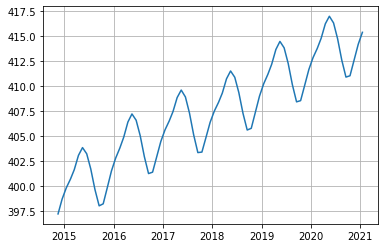

In [ ]:
plt.plot(years[-75:], co2[-75:])
plt.grid()

Hur varierar mätvärdena över ett år? Vad tror du det beror på?
<details>
<summary markdown="span">
Svar
</summary><p>
Växter tar upp koldioxid genom fotosyntes. Det växer som mest när norra halvklotet har sommar och tidig höst (största delen av jordens landyta ligger på norra halvklotet). Därför går koldioxidhalten ner under denna period.</p>

</details>



------

Halten av koldioxid verkar öka hela tiden. Frågan är om det märks någon avmattning på sista tiden? Koden nedan visar även värdena i den tionde kolumnen. Detta är *trend-värden*, dvs medelvärden på mätningarna.

-----

**Uppgift 4d:** Kör koden nedan som visar trendkurvan.


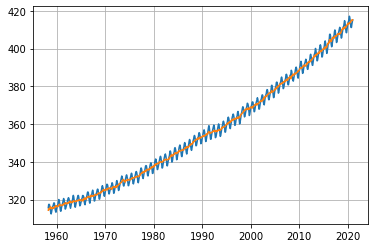

In [ ]:
# Plocka ut år-värden och co2-mätvärden från varje rad
trend = []
for line in data:
  splitted = line.split(",")
  c = float(splitted[8]) # nionde kolumnen, co2
  t = float(splitted[9]) # tionde kolumnen, trend
  if c > 0:  # Lägg till värdet bara om co2-värdet är ett riktigt värde
    trend.append(t)
plt.plot(years, co2)
plt.plot(years, trend)
plt.grid()

**Uppgift 4e:** Kör koden nedan för att se noggrannare på de senaste 75 värdena.

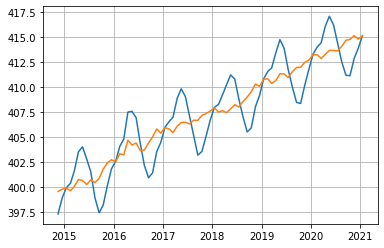

In [ ]:
plt.plot(years[-75:], co2[-75:])
plt.plot(years[-75:], trend[-75:])
plt.grid()

Ser du någon avmattning i trendkurvan?

<details>
<summary markdown="span">
Svar
</summary>
<p>
I slutet av 2020 märktes ännu ingen avmattning. Vi vet att Corona-pandemin under 2020 har lett till något minskade utsläpp, men samtidigt har skogsbränder ökat. Det är också ganska stora naturliga variationer, vilket gör att det kan ta tid innan man ser ändringar. (Källa: <a href="https://www.esrl.noaa.gov/gmd/ccgg/covid2.html">NOAA</a>)</p>
</details>

<hr size=5 noshade>

#Avslutning
Vi hoppas du har fått lite inblick i vad man kan använda programmering till.

För forskare är programmering ett viktigt verktyg för att kunna analysera data och förstå vad som händer i vår miljö.

Om du vill lära dig mer om programmering och hur man kan analysera miljödata, så titta gärna på våra andra uppgifter på [LU Miljödataprogrammering](https://lunduniversity.github.io/schoolprog-satellite/)


<hr size=5 noshade>
<small>
Denna uppgift ingår i <a href="https://lunduniversity.github.io/schoolprog-satellite/">LU Miljödataprogrammering</a>. Copyright © 2020 Lunds universitet, ICOS Carbon Portal och Svenska Science Centers. License: <a href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a>
</small>